In [1]:
import pandas as pd
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

# Constructing Synthetic Basket

1. Calculates the cointegration score of each NASDAQ100 component present in 2018 and 2019 against the QQQ ETF for the year 2018
2. Selects subset of NASDAQ100 components that have a cointegration p-value below 0.2
3. Create a powerset of the cointegrated subset and calculate the cointegration score of the subset against the QQQ ETF
4. Select most cointegrated subset as our synthetic basket which is, by design, cointegrated with QQQ in 2018

In [2]:
tickers = pd.read_csv("../data/nasdaq_comps_2016-2020.csv")

In [3]:
tickers = list(set(tickers['2019']).intersection(set(tickers['2018'])))
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
cointegrationResultsIndividual = fn.runCointTestIndividual(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BMRN
[*********************100%***********************]  1 of 1 completed
LBTYK
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CELG: No data found, symbol may be delisted
err
[*********************100%***********************]  1 of 1 completed
CHKP
[*********************100%***********************]  1 of 1 completed
CTSH
[*********************100%***********************]  1 of 1 completed
KLAC
[*********************100%***********************]  1 of 1 completed
WYNN
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MELI
[*********************100%***********************] 

In [4]:
cointegrationResultsIndividual.head(10)

,ticker,t-stat,pval
12,HAS,-3.476138,0.034570
9,AAPL,-3.268703,0.059170
53,TTWO,-3.186715,0.072178
56,IDXX,-3.156778,0.077458
44,SBUX,-3.125705,0.083256
68,CTAS,-3.089389,0.090454
62,ALXN,-2.892722,0.137956
22,ALGN,-2.865327,0.145781
0,BMRN,-2.797488,0.166485
59,PAYX,-2.703154,0.198446


In [5]:
subset = cointegrationResultsIndividual.loc[cointegrationResultsIndividual['pval'] <= 0.2]
tickers = subset['ticker'].tolist()
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
synthetic_asset_rank = fn.runCointTestBasketsEG(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed
0 done, out of a total of  1013
500 done, out of a total of  1013
1000 done, out of a total of  1013


In [6]:
synthetic_asset_rank.head()

,ticker,t-stat,pval
973,"(HAS, AAPL, TTWO, SBUX, CTAS, ALXN, ALGN, PAYX)",-5.112294,0.000102
857,"(HAS, AAPL, TTWO, SBUX, CTAS, ALXN, ALGN)",-5.082241,0.000116
972,"(HAS, AAPL, TTWO, SBUX, CTAS, ALXN, ALGN, BMRN)",-5.054691,0.000130
984,"(HAS, AAPL, SBUX, CTAS, ALXN, ALGN, BMRN, PAYX)",-5.047519,0.000135
1008,"(HAS, AAPL, TTWO, SBUX, CTAS, ALXN, ALGN, BMRN...",-5.047064,0.000135


# Constructing Multivariate Kalman Filter
1. Construct a multivariate Kalman Filter with each stock in our synthetic basket collectively filtered against QQQ for the year 2019
2. Using the outputted state means, calculate the value of our synthetic basket
3. Generate the spread between our synthetic basket and the QQQ ETF.  We expect this spread to be mean-reverting

In [7]:
# Start from 01-01-2019 and end at 12-31-2019
qqq = pd.read_csv("../data/qqqMinute2019.csv")
has = pd.read_csv("../data/hasMinute2019.csv")
aapl = pd.read_csv("../data/aaplMinute2019.csv")
ttwo = pd.read_csv("../data/ttwoMinute2019.csv")
sbux = pd.read_csv("../data/sbuxMinute2019.csv")
ctas = pd.read_csv("../data/ctasMinute2019.csv")
alxn = pd.read_csv("../data/alxnMinute2019.csv")
algn = pd.read_csv("../data/algnMinute2019.csv")
payx = pd.read_csv("../data/payxMinute2019.csv")

In [8]:
qqq = qqq.set_index('date_time')
qqq = qqq.rename(columns={'close': 'qqqclose'})

has = has.set_index('date_time')
has = has.rename(columns={'close': 'hasclose'})

aapl = aapl.set_index('date_time')
aapl = aapl.rename(columns={'close': 'aaplclose'})

ttwo = ttwo.set_index('date_time')
ttwo = ttwo.rename(columns={'close': 'ttwoclose'})

sbux = sbux.set_index('date_time')
sbux = sbux.rename(columns={'close': 'sbuxclose'})

ctas = ctas.set_index('date_time')
ctas = ctas.rename(columns={'close': 'ctasclose'})

alxn = alxn.set_index('date_time')
alxn = alxn.rename(columns={'close': 'alxnclose'})

algn = algn.set_index('date_time')
algn = algn.rename(columns={'close': 'algnclose'})

payx = payx.set_index('date_time')
payx = payx.rename(columns={'close': 'payxclose'})

data = qqq[['qqqclose']].join([has[['hasclose']], aapl[['aaplclose']], ttwo[['ttwoclose']], sbux[['sbuxclose']], 
                               ctas[['ctasclose']], alxn[['alxnclose']], algn[['algnclose']], payx[['payxclose']]], 
                              how='outer')
data = data.dropna()
data.tail(20)

,qqqclose,hasclose,aaplclose,ttwoclose,sbuxclose,ctasclose,alxnclose,algnclose,payxclose
2019-12-31 15:30:00,212.345,105.7300,293.1700,122.2000,87.6850,268.2800,108.0100,277.8000,84.8400
2019-12-31 15:31:00,212.330,105.7100,293.1768,122.1600,87.7050,268.3100,107.9500,277.5900,84.8500
2019-12-31 15:32:00,212.355,105.6972,293.1400,122.1200,87.7130,268.3200,107.9500,277.8300,84.8600
2019-12-31 15:33:00,212.360,105.6900,293.0200,122.1800,87.7250,268.4400,107.9550,277.8800,84.8700
2019-12-31 15:34:00,212.365,105.6900,293.0165,122.2200,87.7700,268.4900,107.9700,277.8200,84.8900
2019-12-31 15:35:00,212.385,105.6800,293.0170,122.1800,87.7650,268.4800,107.9850,278.1000,84.9100
2019-12-31 15:36:00,212.370,105.6500,292.9450,122.2000,87.7600,268.4793,108.0387,278.0950,84.8800
2019-12-31 15:37:00,212.350,105.6200,293.0400,122.1700,87.7600,268.4900,107.9800,277.8700,84.8800
2019-12-31 15:38:00,212.385,105.6200,293.1316,122.1298,87.7600,268.5600,108.0000,278.1000,84.9000
2019-12-31 15:39:00,212.355,105.6044,293.0800,122.1050,87.7500,268.5800,108.0300,278.0050,84.9300


In [9]:
syntheticAssetLogPrice = data[['hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                               'ctasclose', 'alxnclose', 'algnclose', 'payxclose']].apply(np.log)
qqqLogPrice = np.log(data['qqqclose'].values)

In [10]:
kf = fn.multivariateKalmanFilter(syntheticAssetLogPrice, qqqLogPrice)
state_means, state_covs = kf.filter(qqqLogPrice)
basket_size = len(syntheticAssetLogPrice.columns)
slopes = state_means[:, np.arange(0, basket_size, 1)]
intercept = state_means[:, basket_size]

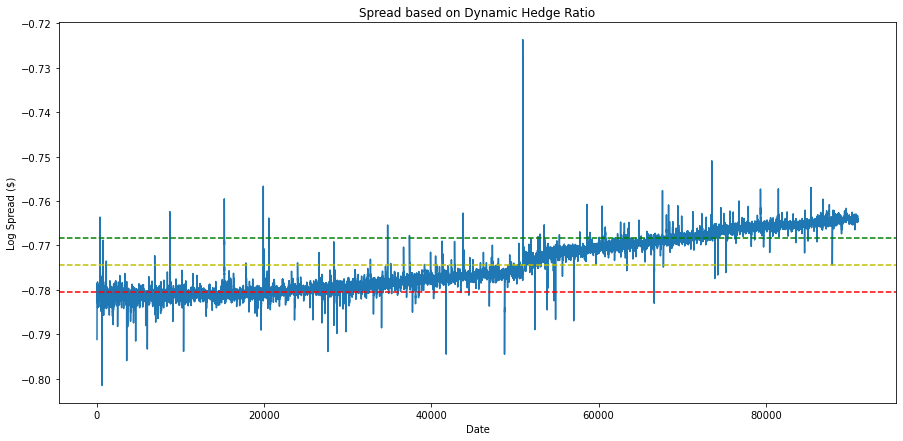

In [11]:
syntheticAssetEstimate = [np.dot(slopes[i], syntheticAssetLogPrice.values[i].T) for i in range(len(slopes))]
spread_ts = qqqLogPrice - syntheticAssetEstimate
plt.figure(figsize = (15,7))
plt.plot(spread_ts)
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")
spread_avg = spread_ts.mean()
spread_sd = spread_ts.std()
upper_threshold = spread_avg + spread_sd
lower_threshold = spread_avg - spread_sd
plt.axhline(upper_threshold, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold, linestyle = 'dashed', color = 'r')

# Building our Strategy
1. Using minute level data from 2018, optimize our strategy parameters by simulating the strategy performance in 2018 with different parameter combinations.  Pick the parameters that give us the highest return in 2018 and use those parameters for our strategy in 2019.
2. Build a Bollinger Band strategy using the lookback and z-score threshold outputted by our parameter tuning module.  When the spread breaks above/below our upper/lower bands, we enter a short/long position on the spread in the minute immediately after.

In [12]:
# Start from 01-01-2018 and end at 12-31-2018
qqq2018 = pd.read_csv("../data/qqqMinute2018.csv")
has2018 = pd.read_csv("../data/hasMinute2018.csv")
aapl2018 = pd.read_csv("../data/aaplMinute2018.csv")
ttwo2018 = pd.read_csv("../data/ttwoMinute2018.csv")
sbux2018 = pd.read_csv("../data/sbuxMinute2018.csv")
ctas2018 = pd.read_csv("../data/ctasMinute2018.csv")
alxn2018 = pd.read_csv("../data/alxnMinute2018.csv")
algn2018 = pd.read_csv("../data/algnMinute2018.csv")
payx2018 = pd.read_csv("../data/payxMinute2018.csv")

In [13]:
qqq2018 = qqq2018.set_index('date_time')
qqq2018 = qqq2018.rename(columns={'close': 'qqqclose'})

has2018 = has2018.set_index('date_time')
has2018 = has2018.rename(columns={'close': 'hasclose'})

aapl2018 = aapl2018.set_index('date_time')
aapl2018 = aapl2018.rename(columns={'close': 'aaplclose'})

ttwo2018 = ttwo2018.set_index('date_time')
ttwo2018 = ttwo2018.rename(columns={'close': 'ttwoclose'})

sbux2018 = sbux2018.set_index('date_time')
sbux2018 = sbux2018.rename(columns={'close': 'sbuxclose'})

ctas2018 = ctas2018.set_index('date_time')
ctas2018 = ctas2018.rename(columns={'close': 'ctasclose'})

alxn2018 = alxn2018.set_index('date_time')
alxn2018 = alxn2018.rename(columns={'close': 'alxnclose'})

algn2018 = algn2018.set_index('date_time')
algn2018 = algn2018.rename(columns={'close': 'algnclose'})

payx2018 = payx2018.set_index('date_time')
payx2018 = payx2018.rename(columns={'close': 'payxclose'})

data2018 = qqq2018[['qqqclose']].join([has2018[['hasclose']], aapl2018[['aaplclose']], ttwo2018[['ttwoclose']], 
                                       sbux2018[['sbuxclose']], ctas2018[['ctasclose']], alxn2018[['alxnclose']], 
                                       algn2018[['algnclose']], payx2018[['payxclose']]], 
                                      how='outer')
data2018 = data2018.dropna()

In [14]:
lookback_list = np.arange(30, 301, 15)
z_thresh_list = np.arange(1, 2.6, .1)
results_map = fn.tuneBBParameters(data2018, lookback_list, z_thresh_list, 
                                  ['hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                                   'ctasclose', 'alxnclose', 'algnclose', 'payxclose'], 
                                 stoploss = None)

C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['logspread'] = spread_ts
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['spread'] = np.exp(spread_ts)
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


10 done, out of 304
20 done, out of 304
30 done, out of 304
40 done, out of 304
50 done, out of 304
60 done, out of 304
70 done, out of 304
80 done, out of 304
90 done, out of 304
100 done, out of 304
110 done, out of 304
120 done, out of 304
130 done, out of 304
140 done, out of 304
150 done, out of 304
160 done, out of 304
170 done, out of 304
180 done, out of 304
190 done, out of 304
200 done, out of 304
210 done, out of 304
220 done, out of 304
230 done, out of 304
240 done, out of 304
250 done, out of 304
260 done, out of 304
270 done, out of 304
280 done, out of 304
290 done, out of 304
300 done, out of 304
304 done, out of 304


In [15]:
list(results_map.items())[:10]

[((75, 1.7000000000000006),
  [17723.433000000434, 1.0561947951869965, 1.5168810030586082]),
 ((270, 1.1), [16315.260900000922, 1.0504213635745323, 1.2380889409563702]),
 ((135, 1.0), [14640.615900000457, 1.0460217535443928, 1.0122326148801364]),
 ((240, 1.2000000000000002),
  [14443.281300001268, 1.0467686534410796, 1.1288055103543595]),
 ((75, 1.6000000000000005),
  [13609.974100000043, 1.0438742435883397, 1.163940674597136]),
 ((300, 1.1), [13523.423100000613, 1.0430002323408611, 1.0315032503291692]),
 ((270, 1.3000000000000003),
  [13451.827100000013, 1.0440681897780024, 1.104996007106529]),
 ((225, 1.3000000000000003),
  [13270.08090000035, 1.0455219247436969, 1.1217631265421277]),
 ((75, 1.8000000000000007),
  [13259.08340000038, 1.042753338141492, 1.2474847673587441]),
 ((240, 1.3000000000000003),
  [12913.893200000664, 1.0444846928480793, 1.1191917337378219])]

In [16]:
params = list(results_map.keys())[0]
print(params)

(75, 1.7000000000000006)


In [17]:
data.reset_index(inplace=True)
data['logspread'] = spread_ts
data['spread'] = np.exp(spread_ts)
data = data.rename(columns={'index': 'datetime'})

In [18]:
backtest_data = data[['datetime', 'qqqclose', 'hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                      'ctasclose', 'alxnclose', 'algnclose', 'payxclose', 'spread']]
lookback = params[0]
z_thresh = params[1].round(2)

In [19]:
backtest_data = fn.createBands(backtest_data, lookback, z_thresh)

Text(0.5, 0, 'Date')

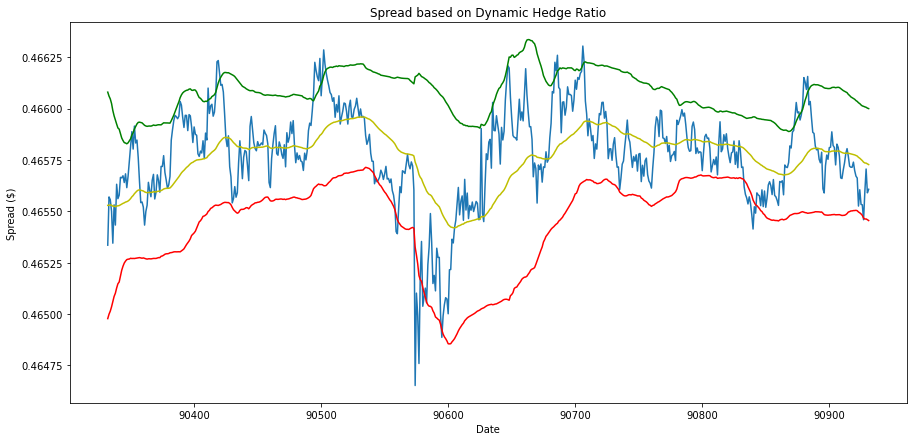

In [20]:
plt.figure(figsize = (15,7))
plt.plot(backtest_data['spread'].iloc[-600:])
plt.plot(backtest_data['upperband'].iloc[-600:], color='g')
plt.plot(backtest_data['ema'].iloc[-600:], color='y')
plt.plot(backtest_data['lowerband'].iloc[-600:], color='r')
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Spread ($)")
plt.xlabel("Date")

In [21]:
backtest_data = fn.createPositions(backtest_data) # no overnight positions, all positions exited by EOD
#backtest_data = fn.createSignal(backtest_data)
#backtest_data['position'] = backtest_data['signal'].shift(1).fillna(0)

In [22]:
prices = backtest_data[['hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                       'ctasclose', 'alxnclose', 'algnclose', 'payxclose']].values
hedge_ratios = np.asarray([slopes.T[i][lookback - 1:] for i in range(len(slopes.T))]).T

In [23]:
tradeLog, minuteDf = fn.constructTradeLog(backtest_data['datetime'].values, backtest_data['position'].values,
                               backtest_data['qqqclose'].values, prices, 
                               hedge_ratios.round(3), stoploss = None,
                               lot_size = 1000)
tradeLog.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
1889,2019-12-31 10:48:00,2019-12-31 11:24:00,32,short,1000,211.75,211.7913,"[91.0, 270.0, 128.0, 93.0, 247.0, 111.0, 145.0...","[106.0, 291.0501, 121.765, 87.465, 268.5399, 1...","[106.0089, 291.9301, 121.8, 87.57, 267.975, 10...",450479.3115,-68.3246,-0.000152
1890,2019-12-31 11:43:00,2019-12-31 12:09:00,26,short,1000,211.77,211.8900,"[91.0, 270.0, 128.0, 93.0, 247.0, 111.0, 145.0...","[105.9, 291.95, 121.7729, 87.685, 267.425, 107...","[105.865, 291.9199, 121.82, 87.535, 267.27, 10...",450163.2912,-99.6248,-0.000221
1891,2019-12-31 14:12:00,2019-12-31 14:44:00,32,long,1000,212.06,212.1750,"[91.0, 270.0, 128.0, 93.0, 247.0, 111.0, 145.0...","[105.5517, 292.1748, 122.05, 87.3901, 267.8371...","[105.55, 292.24, 122.36, 87.57, 268.34, 108.01...",450809.4453,-124.8047,-0.000277
1892,2019-12-31 14:52:00,2019-12-31 15:09:00,17,short,1000,212.15,212.2200,"[91.0, 270.0, 128.0, 93.0, 247.0, 111.0, 144.0...","[105.5321, 292.33, 122.31, 87.55, 267.795, 107...","[105.53, 292.7599, 122.23, 87.565, 268.07, 107...",450686.4461,19.4219,0.000043
1893,2019-12-31 15:46:00,2019-12-31 15:49:00,3,long,1000,212.49,212.4300,"[91.0, 270.0, 128.0, 93.0, 247.0, 111.0, 144.0...","[105.63, 293.43, 122.15, 87.8547, 268.84, 108....","[105.51, 293.27, 122.21, 87.815, 268.795, 108....",451608.3463,-13.5337,-0.000030


<ipython-input-24-4913ea6083e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df['cumulative_returns'] = np.cumprod(1 + minuteDf['returns'])


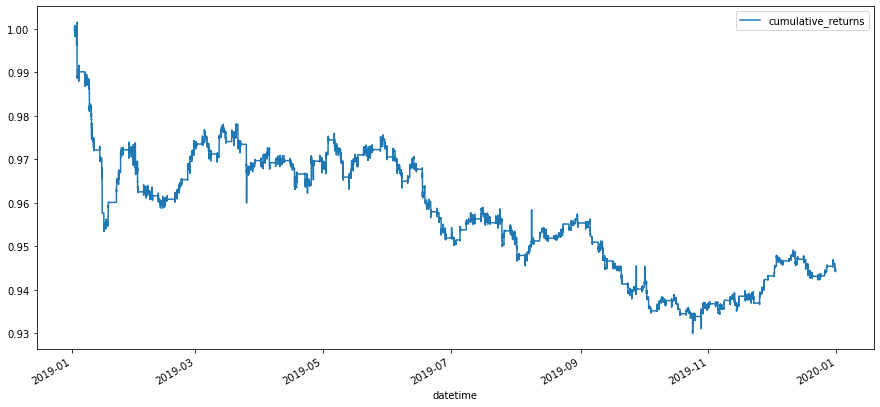

In [24]:
returns_df = minuteDf[['datetime']]
returns_df['cumulative_returns'] = np.cumprod(1 + minuteDf['returns'])
returns_df = returns_df.set_index('datetime')
returns_df.plot(figsize=[15, 7])

In [25]:
total_profit = tradeLog['trade_profit'].sum()
print('Trade Log cumulative profit was {:.3f}'.format(total_profit))

Trade Log cumulative profit was -19704.669


In [26]:
cumulative_return = np.cumprod(1 + tradeLog['trade_returns']) - 1
print('Trade Log cumulative return was {:.3f}%'.format(cumulative_return.iloc[-1] * 100))

Trade Log cumulative return was -5.515%


In [27]:
minuteDf['datetime'] = pd.to_datetime(minuteDf['datetime'])
dailyReturns = fn.calculateDailyReturns(minuteDf[['datetime', 'returns']])
sharpeRatio = fn.calculateAnnualizedSharpeRatio(dailyReturns)
print('Annualized Sharpe Ratio: ', sharpeRatio)

Annualized Sharpe Ratio:  -1.6404789012874597


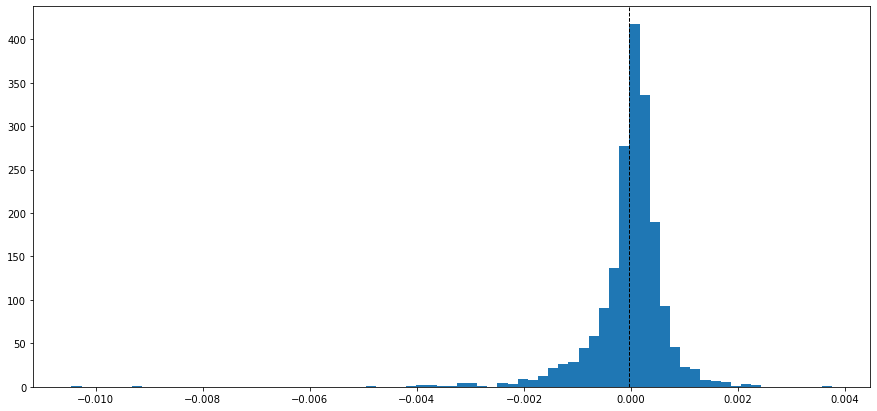

In [28]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['trade_returns'], bins=75)
plt.axvline(tradeLog['trade_returns'].mean(), color='k', linestyle='dashed', linewidth=1)

In [29]:
tradeLog['trade_returns'].quantile(0.1)

-0.0007130144166745504

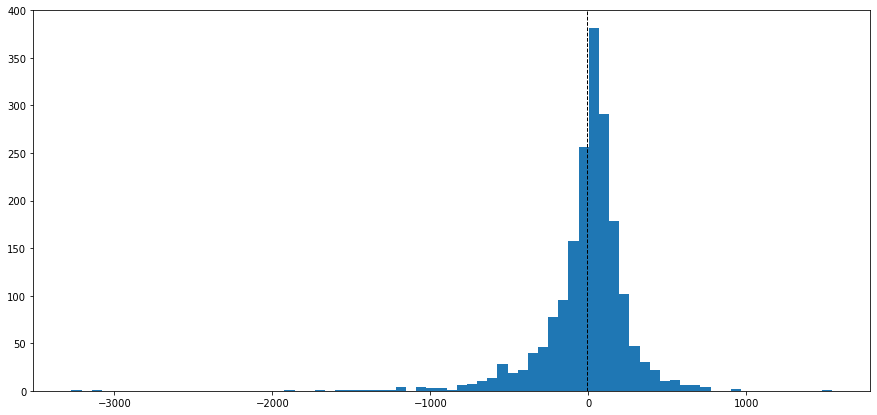

In [30]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['trade_profit'], bins=75)
plt.axvline(tradeLog['trade_profit'].mean(), color='k', linestyle='dashed', linewidth=1)

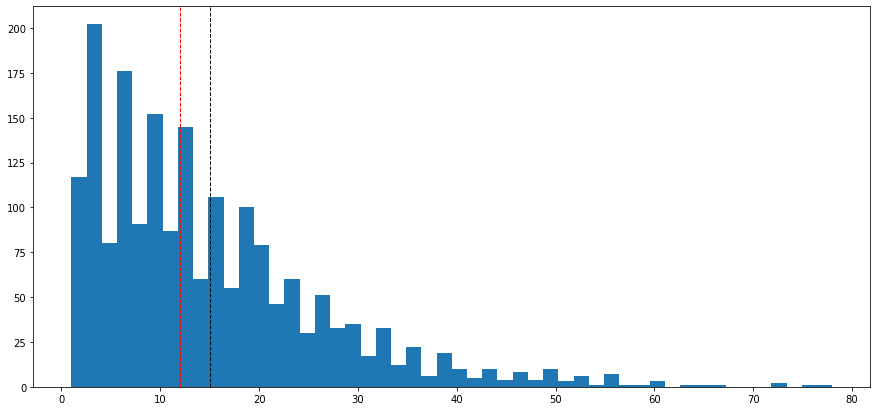

In [31]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['holdingPeriod'], bins=50)
plt.axvline(tradeLog['holdingPeriod'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tradeLog['holdingPeriod'].median(), color='r', linestyle='dashed', linewidth=1)